# University of Canberra
#### 11482 - Pattern Recognition and Machine Learning
#### Tutorial Class Thursday 0930 (Semester 2 / 2024)
#### Assignment Stage 1 Part B
#### Group 101 (Individual)
#### James McGuinness

# 1. Introduction
Introduce the problem you wish to solve (use the MNIST case as a guide). Explain what questions would you want to ask from the selected dataset?  
*(10 pts)*

The problem I wish to solve in part B of the assignment is to build a supervised learning model that can accurately classify the clothing images into their respective categories.  
The questions I would want to ask as as follows:
1. What is the baseline performance?
2. Which features or pixels are most significant?
3. Can we achieve human-level performance?
4. How well does the model generalise?

https://www.kaggle.com/datasets/zalando-research/fashionmnist

# 2. Dataset Description
What do the rows and columns mean and are there any special characteristics in the data to use in modelling the learning?  
How would you visualise data to extract patterns to use?  
*(5 pts)*

- The Fashion-MNIST dataset contains pictures of clothing. 
- The clothing is from a brand called Zalando. From a brief search online it appears Zalando is a clothing retailer and tech company.
- Each picture is 28x28 pixels = 748 pixels
- Each row represents an individual piece of clothing 
- Column 1 is the class label 
- Columns 2 to 748 are pixel integers, range from 1 to 255. 
- This is actually a larger dataset than I expected

# 3. Logistic Regression Explanation
Why would Logistic Regression suit as the learning model to answer the questions?  
Explain why Logistic Regression suits the dataset and problems  
*(5 pts)*

- Recognizing pictures of clothing into their appropriate class label is considered a multi-classification problem
- Logistic Regression is a simple model that can be applied easily to multi classification problems

# 4. Retrieving data
Retrieving data in the program - explain how this is done?  
*(5 pts)*

- I chose to down load the zip file, there are numerous other ways however, I believe this is easy and simple regarding marking purposes and modulation of code.
- Download zip folder from https://www.kaggle.com/datasets/zalando-research/fashionmnist
- Extract the zip file to directory .\Fashion-MNIST
- Run below statements to import

In [13]:
import pandas as pd
train = pd.read_csv('.\\Fashion-MNIST\\fashion-mnist_train.csv')
test = pd.read_csv('.\\Fashion-MNIST\\fashion-mnist_test.csv')

# 5. Exploring the data
Explain any special adaptation and characteristics  
Explore data for patterns and relationships as used in the design  
Use visualisation and other relevant statistics measures (as for MNIST).  
*(5 pts)*

- The dataset does have a high dimensionality, considering each image contains 28x28 pixels which gives us a 784 dimensional sample. 
- An adaption could be applying Principle Component Analysis to reduce the dimensionality (yet to investigate further).
- As each pixel has a range from 0 to 255, I should investigate scaling and normalizing this down.
- Additionally to prevent over-fitting I will investigate regularization, to tune down the impact and influence of features across the board
- The data has come in two separate .csv files and is already split into Training and Testing datasets

## i. Show image & data

- The below code creates a hashtable of label to word for easy handling of data

In [14]:
label_mapping = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
train['label'] = train['label'].map(label_mapping)
test['label'] = test['label'].map(label_mapping)

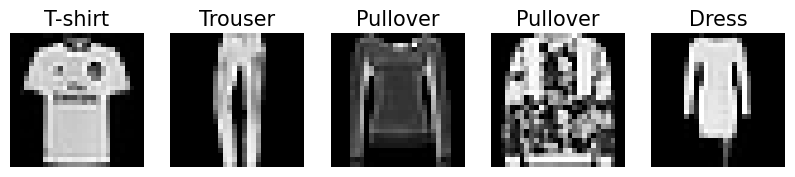

In [15]:
import numpy as np
import matplotlib.pyplot as plt

labels = train['label'].values
images = train.drop('label', axis=1).values

labels = test['label'].values
images = test.drop('label', axis=1).values

plt.figure(figsize=(10,2))
for idx in range(5):
    image = images[idx]
    label = labels[idx]
    plt.subplot(1, 5, idx + 1)
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    plt.title(f'{label}', fontsize=15)
    plt.axis('off')

plt.show()

## ii. Show corresponding matrix

In [16]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,Trouser,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,Bag,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,Bag,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print(np.array(train.iloc[1, 1:]).reshape(28, 28))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 81 21 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 14 200 49 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 1 1 1 0 1 0 0 0 162 184 165 20 0 1 1 3 4 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 2 0 2 0 120 183 154 206 32 0 5 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 76 227 151 139 158 0 0 0 0 0 66 23 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 55 224 162 143 121 204 236 144 21 74 90 190
  8 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 42 228 160 148 125 165 223 208 221 246 211
  174 151 0 0]
 [0 0 0 1 3 0 1 0 3 0 9 0 23 230 168 147 119 163 227 206 200 190 206 186
  139 171 41 0]
 [0 0 0 0 0 0 0 0 3 4 0 16 209 185 139 118 181 227 209 204 210 199 225
  157 127 190 111 0]
 [1 3 2 1 3 2 3 0 0 0 67 214 

## iii. Describe & understand the data

- Each image corresponds with a label which represents the type of clothing. I've mapped these labels to names such as T-Shirt and Trouser to make the data more interpretable
- Each image is an array of 784 pixels (28x28) and ranges from 0 being black to 255 being white
- The above code visualises the pictuers and their associated label. 
- Viewing the matrix to the screen shows how the data is structured and displaying the pixel intensity demonstrates the shape of the clothing item

# 6. Build a Logistic Regression Model
Explain logistic regression and how it suits the chosen dataset and the problem?  
*(6 pts)*

- Logistic Regression is a statistical method used for binary and multi classification problems
- Unlike Linear Regression, which predicts a continuous amount - Logistic Regression predicts the probably of an input to a particular class
- Logistic Regression uses a Sigmoid Function to predict the outcome category for a sample
- The Fashion MNIST dataset is a classification problem where the goal is to categorise images correctly into one of 10 classes, Logistic Regression is a natural choice for this problem
- Initially Logistic Regression could be our baseline model, that we could compare against if deciding to investigate Neural Networks
- Determining the weights and investigating over-fitting / regularisation are easy explored in Logistic Regression

## i. Load packages

In [18]:
import sys
sys.path.append('C:\\Users\\James\\Desktop\\RoboticsJourney\\Self_Study\\1.PatternReg.ML\\introduction_to_ml_with_python')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## ii. Select Target Variable

In [19]:
y = train['label']

## iii. Prepare data

In [20]:
n_samples = len(train)
n_samples
train.shape

(60000, 785)

## iv. Split data into training and validation set

In [21]:
print(len(train))
print(len(test))

60000
10000


In [22]:
X_train = train.drop('label', axis=1)
y_train = train['label']

X_test = test.drop('label', axis=1)
y_test = test['label']

In [23]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


In [93]:
# I don't need the below statement as the data came split in two .csv files 
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0)

## v. Select a linear regression classifier

In [42]:
logreg = LogisticRegression(solver='lbfgs')

## vi. Fit the data

In [43]:
logreg.fit(X_train, y_train)

C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
logreg.score(X_test, y_test)

0.8544

## My own investigations (Scaling data)
- I decided to investigate and explore some Scaling options on the dataset
- Please jump to the next section **vii. Prediction of unseen data**

### StandardScaler

In [41]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
stdscaler.fit(X_train)

X_train_stdscaled = stdscaler.transform(X_train)
X_test_stdscaled = stdscaler.transform(X_test)

logreg.fit(X_train_stdscaled, y_train)
logreg.score(X_test_stdscaled, y_test)

C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8521

### MinMaxScaler - 47secs with 0.85 score

In [27]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

X_train_mm_scaler = mm_scaler.transform(X_train)
X_test_mm_scaler = mm_scaler.transform(X_test)

logreg.fit(X_train_mm_scaler, y_train)
logreg.score(X_test_mm_scaler, y_test)

C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8565

### Normalizer

In [ ]:
from sklearn.preprocessing import Normalizer
norm_scaler = Normalizer()
norm_scaler.fit(X_train)

X_train_norm_scaler = norm_scaler.transform(X_train)
X_test_norm_scaler = norm_scaler.transform(X_test)

logreg.fit(X_train_norm_scaler, y_train) 
logreg.score(X_test_norm_scaler, y_test)

### Feature Reduction (Principal Component Analysis)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(X_train_stdscaled)

X_pca = pca.transform(X_train_stdscaled)
X_test_pca = pca.transform(X_test_stdscaled)

logreg_PCA = LogisticRegression(solver='lbfgs')

logreg_PCA.fit(X_pca, y_train)
logreg_PCA.score(X_test_pca, y_test)

C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5059

## vii. Prediction of unseen data

In [45]:
y_pred = logreg.predict(X_test)

In [46]:
y_pred

array(['T-shirt', 'Trouser', 'Pullover', ..., 'Bag', 'Bag', 'Pullover'],
      dtype=object)

In [47]:
np.mean(y_pred == y_test)

0.8544

In [48]:
logreg.score(X_test, y_test)

0.8544

# 7a. Analysis of results

## i. Create confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[947   3   0   0   0  14   0  36   0   0]
 [  2 950   5   2   9   7  17   4   2   2]
 [  0   3 822  34  72   1  65   0   1   2]
 [  0   3  29 871  16   0  23   0  30  28]
 [  0  12 122  13 762   0  75   0  14   2]
 [ 38  10   0   0   0 883   1  64   2   2]
 [  0  16 109  31 106   0 584   0 147   7]
 [ 40   1   0   0   0  27   0 932   0   0]
 [  1  19   7  31  18   0  96   0 817  11]
 [  0   0   0  13   4   2   4   0   1 976]]


In [30]:
# The above is actually cool - comparing classes (labels) against how they were classified

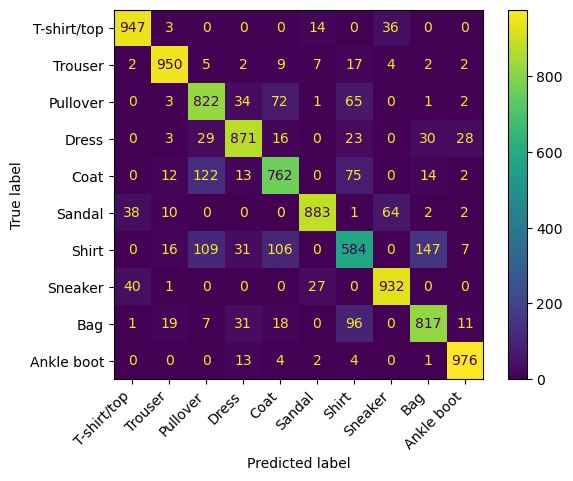

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
cmd = ConfusionMatrixDisplay(confusion, display_labels=class_names)
cmd.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

## ii. Visualise correct predicion

In [70]:
# images_and_predictions = list(zip(X_train, logreg.predict(X_train)))
# images_and_predictions = list(zip(X_train, y_train))
# TODO - strange I don't understand why the above statements are in the lab.


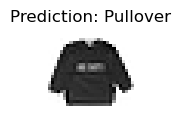

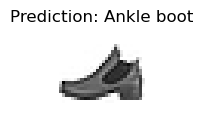

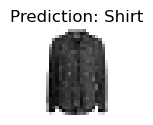

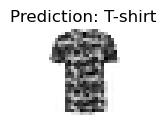

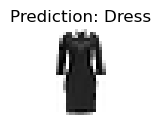

In [51]:
for idx in range(5):
    image = X_train.iloc[idx,:]
    # prediction = logreg.predict(X_train)[idx]
    # TODO - also strange that we predict above, but this could also be incorrect?
    prediction = y_train[idx]
    plt.subplot(1,5,idx+1)
    plt.axis("off")
    plt.imshow(np.array(image).reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %s' % (prediction))
    plt.show()

## iii. Visualize misclassified images

In [52]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_train, y_pred):
    # print(f"{label} ne {predict} = {label != predict}")    
    if label != predict:        
        misclassifiedIndexes.append(index)
    index +=1

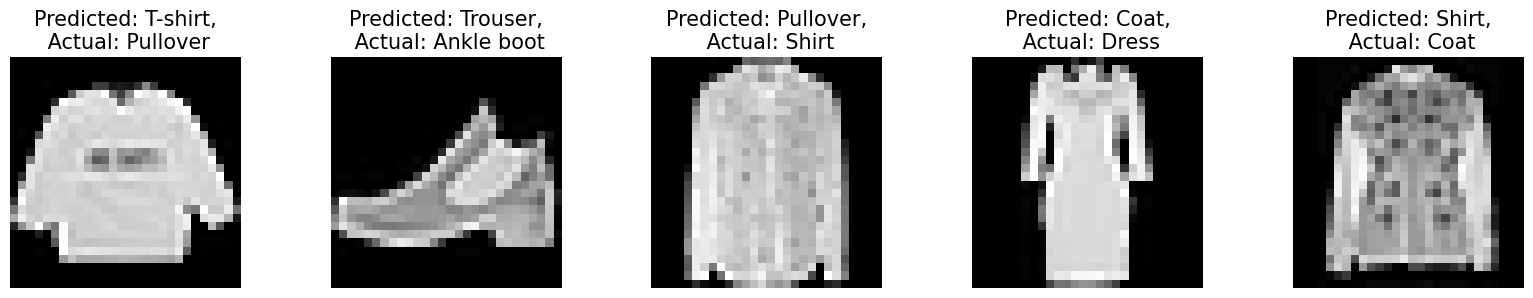

In [53]:
plt.figure(figsize=(20,3))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.axis("off")
    plt.imshow(np.array(X_train.iloc[badIndex, :]).reshape(28, 28), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('Predicted: {},\n Actual: {}'.format(y_pred[badIndex], np.array(y_train)[badIndex]), fontsize = 15)

In [54]:
len(misclassifiedIndexes)
# for m in misclassifiedIndexes:
#     print(f"{y_pred[m]} + {y_train[m]}")
#     check = y_pred[m] == y_train[m]
#     print(check)     


9018

## iv. Visualize corrected images

In [55]:
# Extract misclassified examples and their true labels
misclassified_X = np.array(X_test.iloc[misclassifiedIndexes])
misclassified_y = np.array(y_test.iloc[misclassifiedIndexes])

In [56]:
# Combine original training set with misclassified examples
X_combined = np.vstack((X_train, misclassified_X))
y_combined = np.concatenate((y_train, misclassified_y))

# Optionally, shuffle the combined dataset to avoid any order bias
from sklearn.utils import shuffle
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=0)

In [57]:
# Train the model again with the new combined training set
lr = LogisticRegression(solver='lbfgs', max_iter=1000)  # Increase iterations if needed
lr.fit(X_combined, y_combined)

# Evaluate the retrained model
y_pred_updated = lr.predict(X_test)
score_updated = lr.score(X_test, y_test)
print("Updated score:", score_updated)

# Optional: Recalculate misclassified indexes for new insights
misclassifiedIndexes_updated = [index for index, (label, predict) in enumerate(zip(y_test, y_pred_updated)) if label != predict]
print("Number of misclassified examples:", len(misclassifiedIndexes_updated))

Updated score: 0.8755
Number of misclassified examples: 1245


C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


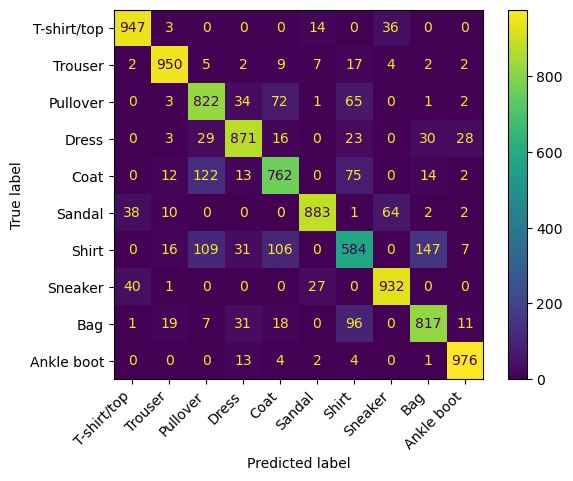

In [58]:
confusion = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion, display_labels=class_names)
cmd.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

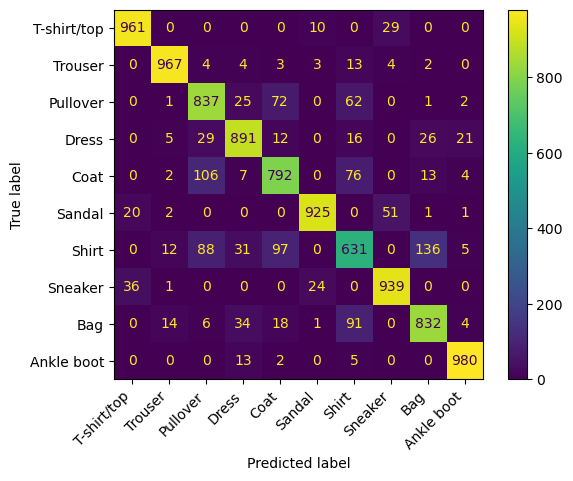

In [59]:
confusion = confusion_matrix(y_test, y_pred_updated)
cmd = ConfusionMatrixDisplay(confusion, display_labels=class_names)
cmd.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

# 7b. Analysis of results
Explain the classification report and accuracy evaluation.  
How might cross-validation be used when training a logistic regression model - use the example to illustrate.  
*(10 pts)*

## Classification Report

### Classification Report 1

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.92      0.95      0.93      1000
     Trouser       0.93      0.95      0.94      1000
    Pullover       0.75      0.82      0.79      1000
       Dress       0.88      0.87      0.87      1000
        Coat       0.77      0.76      0.77      1000
      Sandal       0.95      0.88      0.91      1000
       Shirt       0.68      0.58      0.63      1000
     Sneaker       0.90      0.93      0.92      1000
         Bag       0.81      0.82      0.81      1000
  Ankle boot       0.95      0.98      0.96      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



- The above classification report provides a breakdown of the models performance across the different classes
- Key metrics:
1. Precision
   - Measures the accuracy of positive predictions
   - Precision = True Positives / (True Positives + False Positives)
   - Eg: "T-shirt/top" has a 92% precision, meaning that 92% of the time when the model predicted "T-shirt/top" it was correct
2. Recall
   - Measures the models ability to capture all relevant instances
   - Recall = True Positives / (True Positives + False Negatives)
   - Eg: "Pullover" has a recall of 82%, meaning the model correctly identified 82% of all "Pullover" items in the test set
3. F1-Score
   - Indicates that the model has a good balance of precision and recall for that class
4. Support
   - This is the total number of samples in each class

**Accuracy**
   - Is determined by:
     - Accuracy = Number of Correct Predictions / Total Numbers of Predictions
     - 0.85 means 85% of the images in the test set where classified correctly.

### Classification Report 1
- Running the Classification report again with updated y_pred_updated variable
- Note: Accuracy improves to 88%

In [71]:
print(classification_report(y_test, y_pred_updated, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.94      0.96      0.95      1000
     Trouser       0.96      0.97      0.97      1000
    Pullover       0.78      0.84      0.81      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.80      0.79      0.79      1000
      Sandal       0.96      0.93      0.94      1000
       Shirt       0.71      0.63      0.67      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.82      0.83      0.83      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



## Cross Validation

- Used to evaluation generalization performance that is more stable and thorough than using a split. 
- The returned scores show us how accurate the model of choice would be on average
- Benefits of CV over Train Test Split
  - Reduces likelihood of overfitting
  - No bias split in the data eg: by some coincidence we have all hard samples in the test dataset
  - Using more of the data eg: 5 fold CV in each iteration we use four-fifths of the data (80%)
- The purpose of CV is only to evaluate how well a given algorithm will generalize when trained on a specific dataset.
- So we can try different hyper-parameters of the LogisticRegression model and see what returns the best score

In [26]:
from sklearn.model_selection import cross_val_score

In [37]:
logreg = LogisticRegression(solver='lbfgs')

In [ ]:
crossvalscore = cross_val_score(logreg, X_train, y_train) # 30 seconds

In [39]:
crossvalscore.mean()
crossvalscore

array([0.84991667, 0.84866667, 0.85533333, 0.85016667, 0.8505    ])

# 8. Regularization 
Explain the concept of regularization in logistic regression and how does it prevent overfitting?  
Explain how can it be used in Fashion-MNIST modelling?  
*(5 pts)*

TODO  
- The default value of C is 1
- L1 Regularization will only use a few features, and would be easy to explain
- L2 Regularization is the default
- Where the magnitude of the coefficients are as small as possible
- This mean the features have as little effect on the outcome as possible (meaning a small slope)
- It means explicitly restricting a model to avoid overfitting. 
- By default the LogisticRegression model uses L2 Regularization 
- The parameter C is used to determine the strength of regularization
- Higher values of C corresponds to "less regularization"
  - LogisticRegression will try to fit the training data as much as possible
  - Higher values stress the importance of each individual data point to be classified correctly
  - This results in overfitting
- Lower values of C corresponders to "more regularization"
  - LR will put more emphasis on finding a coefficient vector (w) that is close the zero
  - It will adjust to the majority of data points
  - This results in underfitting

In [45]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000) # 44 seconds
logreg.fit(X_train_mm_scaler,y_train)
print(f"Train Score: {logreg.score(X_train_mm_scaler,y_train)}")
print(f"Test Score: {logreg.score(X_test_mm_scaler,y_test)}")

Train Score: 0.87965
Test Score: 0.8538


In [46]:
logreg100 = LogisticRegression(solver='lbfgs', max_iter=1000, C=100) # 44 seconds
logreg100.fit(X_train_mm_scaler,y_train)
print(f"Train Score: {logreg100.score(X_train_mm_scaler,y_train)}")
print(f"Test Score: {logreg100.score(X_test_mm_scaler,y_test)}")

Train Score: 0.8835666666666666
Test Score: 0.8477


C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 9. Access saved model
Save the trained model and explain how you would use it for new unseen data.  
How would you access and use it for prediction on new inputs?  
(*4 pts*)

# Rubric
https://uclearn.canberra.edu.au/courses/16042/assignments/129302

# References

- TODO
- ChatGPT
- Kaggle
- Learning python PDF

**End of document**